In [1]:
from fastai.text import *
import html

In [2]:
df_imdb = pd.read_csv('./movie_data.csv', encoding='utf-8')

In [3]:
df_imdb.head()

review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1

In [4]:
trn_texts = df_imdb.loc[0:24999, 'review'].values
trn_labels = df_imdb.loc[0:24999, 'sentiment'].values
val_texts = df_imdb.loc[25000:49999, 'review'].values
val_labels = df_imdb.loc[25000:49999, 'sentiment'].values

In [5]:
np.random.seed(42)
trn_idx = np.random.permutation(len(trn_texts))
val_idx = np.random.permutation(len(val_texts))
trn_texts = trn_texts[trn_idx]
val_texts = val_texts[val_idx]

trn_labels = trn_labels[trn_idx]
val_labels = val_labels[val_idx]

In [6]:
col_names = ['labels','text']
df_trn = pd.DataFrame({'text':trn_texts, 'labels':trn_labels}, columns=col_names)
df_val = pd.DataFrame({'text':val_texts, 'labels':val_labels}, columns=col_names)

In [7]:
df_trn['labels'].value_counts()

1    12500
0    12500
Name: labels, dtype: int64

In [8]:
df_val['labels'].value_counts()

1    12500
0    12500
Name: labels, dtype: int64

In [9]:
# Language model data
data_lm = TextLMDataBunch.from_df('./', train_df=df_trn, valid_df=df_val)
# Classifier model data
data_clas = TextClasDataBunch.from_df('./', train_df=df_trn, valid_df=df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [10]:
learn = language_model_learner(data_lm, pretrained_fnames=['lstm_wt103', 'itos_wt103'],drop_mult=0.5)#(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.5)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


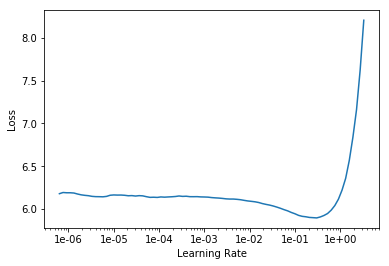

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(1, 1e-2)

In [14]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

In [ ]:
learn.predict("This is a review about", n_words=10)

'This is a review about xxmaj retooled xxmaj fallout : " tug of the lights'

In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [ ]:
data_clas.show_batch()

In [ ]:
classifier.fit_one_cycle(1, 1e-2)

In [ ]:
classifier.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

In [ ]:
learn.predict("This was a great movie!")

In [ ]:
learn.predict("This was a not great movie!")